# Practical 1: IOT and National Accounts

In [1]:
# import modules
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# set graph parameters
plt.style.use("bmh")
LEGEND_STYLE = {
    "loc": "upper center",
    "ncol": 7,
    "bbox_to_anchor": (0.5, -0.1),
    "fancybox": True,
}

## GDP: expenditure vs production vs income
### Data pre-processing

In [2]:
# Import data
FILEPATH = "../data/eurostat/nama_10_gdp_linear.csv.gz"
eurostat_data = pd.read_csv(FILEPATH, compression="gzip")
# Visualize data
eurostat_data

,DATAFLOW,LAST UPDATE,freq,unit,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,CLV05_MEUR,B1G,AT,1995,177617.0,NaN
1,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,CLV05_MEUR,B1G,AT,1996,180999.4,NaN
2,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,CLV05_MEUR,B1G,AT,1997,184799.1,NaN
3,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,CLV05_MEUR,B1G,AT,1998,192025.4,NaN
4,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,CLV05_MEUR,B1G,AT,1999,198247.2,NaN
...,...,...,...,...,...,...,...,...,...
821938,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,PYP_MNAC,YA1,XK,2017,0.0,NaN
821939,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,PYP_MNAC,YA1,XK,2018,0.0,NaN
821940,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,PYP_MNAC,YA1,XK,2019,0.0,NaN
821941,ESTAT:NAMA_10_GDP(1.0),16/02/23 23:00:00,A,PYP_MNAC,YA1,XK,2020,0.0,NaN


In [3]:
# Check the data structure
eurostat_data.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'na_item', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [4]:
# We are only interested in data in euros 
eurostat_data["unit"].unique()

array(['CLV05_MEUR', 'CLV05_MNAC', 'CLV10_MEUR', 'CLV10_MNAC',
       'CLV15_MEUR', 'CLV15_MNAC', 'CLV_I05', 'CLV_I10', 'CLV_I15',
       'CLV_PCH_PRE', 'CON_PPCH_PRE', 'CP_MEUR', 'CP_MNAC',
       'CP_MPPS_EU27_2020', 'PC_EU27_2020_MEUR_CP',
       'PC_EU27_2020_MPPS_CP', 'PC_GDP', 'PD05_EUR', 'PD05_NAC',
       'PD10_EUR', 'PD10_NAC', 'PD15_EUR', 'PD15_NAC', 'PD_PCH_PRE_EUR',
       'PD_PCH_PRE_NAC', 'PYP_MEUR', 'PYP_MNAC'], dtype=object)

In [5]:
# Only keeps "CP_MEUR" data (check link for more info)
# https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm 
MASK = eurostat_data["unit"] == "CP_MEUR"
eurostat_data = eurostat_data[MASK] 

In [6]:
# Visualize "na_items" (= National accounts indicator)
# https://dd.eionet.europa.eu/vocabulary/eurostat/na_item/view
eurostat_data['na_item'].unique()

array(['B11', 'B111', 'B112', 'B1G', 'B1GQ', 'B2A3G', 'D1', 'D11', 'D12',
       'D2', 'D21', 'D21X31', 'D2X3', 'D3', 'D31', 'P3', 'P31_S13',
       'P31_S14', 'P31_S14_S15', 'P31_S15', 'P32_S13', 'P3_P5', 'P3_P6',
       'P3_S13', 'P41', 'P51G', 'P52', 'P52_P53', 'P53', 'P5G', 'P6',
       'P61', 'P62', 'P7', 'P71', 'P72', 'YA0', 'YA1', 'YA2'],
      dtype=object)

### Income approach

In [7]:
# select the period range for comparison
START_YEAR = 2011

In [8]:
# select national account codes to be isolated in the data 
# https://dd.eionet.europa.eu/vocabulary/eurostat/na_item/view
# "B2A3G" = "Operating surplus and mixed income, gross"
# "D1" = "Compensation of employees"
# "D2X3" = "Taxes on production and imports less subsidies"

INDICATORS_INCOME = ["B2A3G", "D1", "D2X3"]

# Ensure all items are available in the GDP breakdown csv
if not set(eurostat_data['na_item'].unique()) & set(INDICATORS_INCOME) == set(INDICATORS_INCOME):
    raise ValueError("Missing indicators")

In [9]:
# only keeps rows for the above indicators after "START_YEAR"
MASK = (eurostat_data['na_item'].isin(INDICATORS_INCOME)) & (eurostat_data['TIME_PERIOD'] >= START_YEAR)
eurostat_income = eurostat_data[MASK][['geo', 'TIME_PERIOD', 'na_item', 'OBS_VALUE']]
eurostat_income

,geo,TIME_PERIOD,na_item,OBS_VALUE
309071,AT,2011,B2A3G,126617.3
309072,AT,2012,B2A3G,127489.3
309073,AT,2013,B2A3G,127755.3
309074,AT,2014,B2A3G,131921.0
309075,AT,2015,B2A3G,135954.9
...,...,...,...,...
318324,XK,2015,D2X3,NaN
318325,XK,2016,D2X3,NaN
318326,XK,2017,D2X3,NaN
318327,XK,2018,D2X3,NaN


In [10]:
# Re-organize dataframe structure
eurostat_income = eurostat_income.pivot(index=['geo', 'TIME_PERIOD'], columns='na_item', values='OBS_VALUE')
eurostat_income

na_item             B2A3G        D1     D2X3
geo TIME_PERIOD                             
AT  2011         126617.3  144318.2  39193.2
    2012         127489.3  150324.4  40839.4
    2013         127755.3  154509.2  41645.6
    2014         131921.0  158788.9  42436.2
    2015         135954.9  163660.9  44653.4
...                   ...       ...      ...
XK  2015              NaN       NaN      NaN
    2016              NaN       NaN      NaN
    2017              NaN       NaN      NaN
    2018              NaN       NaN      NaN
    2019              NaN       NaN      NaN

[473 rows x 3 columns]

In [11]:
# check for nan values and replace them with 0
if eurostat_income.isna().any().any():
    # check columns with nan values
    columns_with_nan = eurostat_income.columns[eurostat_income.isna().any()].tolist()
    # check rows with nan values
    rows_with_nan = eurostat_income[columns_with_nan].isna().any(axis=1)
    # display result
    print(eurostat_income[rows_with_nan])
    warnings.warn("Nan values detected. Nan values replaced with 0")
    eurostat_income = eurostat_income.fillna(0)

na_item          B2A3G  D1      D2X3
geo TIME_PERIOD                     
ME  2013           NaN NaN       NaN
    2014           NaN NaN       NaN
    2015           NaN NaN       NaN
NL  2022           NaN NaN  100147.0
RS  2011           NaN NaN       NaN
    2012           NaN NaN       NaN
    2013           NaN NaN       NaN
    2014           NaN NaN       NaN
    2021           NaN NaN       NaN
XK  2011           NaN NaN       NaN
    2012           NaN NaN       NaN
    2013           NaN NaN       NaN
    2014           NaN NaN       NaN
    2015           NaN NaN       NaN
    2016           NaN NaN       NaN
    2017           NaN NaN       NaN
    2018           NaN NaN       NaN
    2019           NaN NaN       NaN


/tmp/ipykernel_594308/3301116895.py:9: UserWarning: Nan values detected. Nan values replaced with 0
  warnings.warn("Nan values detected. Nan values replaced with 0")


In [12]:
# Calculate GDP (= B2A3G + D1 + D2X3)
# Note: nan + n = nan (which is why we needed to replace nan with 0)
eurostat_income['GDP'] = eurostat_income['B2A3G'] + eurostat_income['D1'] + eurostat_income['D2X3']
eurostat_income

na_item             B2A3G        D1     D2X3       GDP
geo TIME_PERIOD                                       
AT  2011         126617.3  144318.2  39193.2  310128.7
    2012         127489.3  150324.4  40839.4  318653.1
    2013         127755.3  154509.2  41645.6  323910.1
    2014         131921.0  158788.9  42436.2  333146.1
    2015         135954.9  163660.9  44653.4  344269.2
...                   ...       ...      ...       ...
XK  2015              0.0       0.0      0.0       0.0
    2016              0.0       0.0      0.0       0.0
    2017              0.0       0.0      0.0       0.0
    2018              0.0       0.0      0.0       0.0
    2019              0.0       0.0      0.0       0.0

[473 rows x 4 columns]

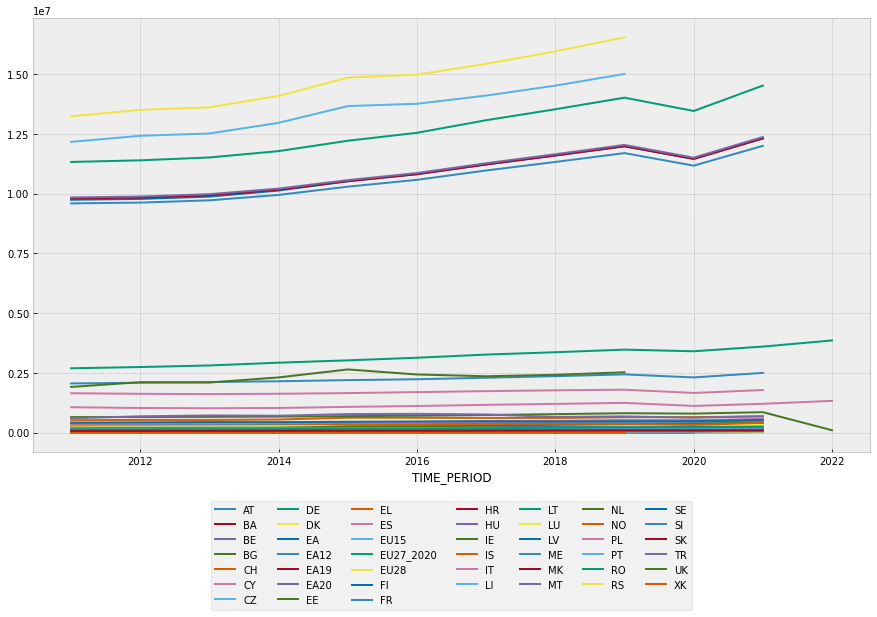

In [13]:
# Visualize result (only GDP)
eurostat_income['GDP'].unstack('geo'
                        ).plot(figsize=(15, 8)
                                ).legend(**LEGEND_STYLE)

### Expenditure approach

In [14]:
# select national account codes to be isolated in the data 
# https://dd.eionet.europa.eu/vocabulary/eurostat/na_item/view
# "P3" = "Final consumption expenditure"
# "P51G" = "Gross fixed capital formation"
# "P52" = "Changes in inventories"
# "P53" = "Acquisitions less disposals of valuables"
# "P6" = "Exports of goods and services"
# "P7" = " Imports of goods and services"

INDICATORS_EXPENDITURE = ["P3", "P51G", "P52", "P53", "P6", "P7"]

# Ensure all items are available in the GDP breakdown csv
set(eurostat_data['na_item'].unique()) & set(INDICATORS_EXPENDITURE) == set(INDICATORS_EXPENDITURE)

True

In [15]:
# only keeps rows for the above indicators after "START_YEAR"
MASK = (eurostat_data['na_item'].isin(INDICATORS_EXPENDITURE)) & (eurostat_data['TIME_PERIOD'] >= START_YEAR)
eurostat_expenditure = eurostat_data[MASK][['geo', 'TIME_PERIOD', 'na_item', 'OBS_VALUE']]
eurostat_expenditure

,geo,TIME_PERIOD,na_item,OBS_VALUE
320385,AL,2011,P3,8274.2
320386,AL,2012,P3,8513.3
320387,AL,2013,P3,8764.4
320388,AL,2014,P3,9195.0
320389,AL,2015,P3,9423.0
...,...,...,...,...
343785,XK,2017,P7,3374.1
343786,XK,2018,P7,3820.2
343787,XK,2019,P7,3982.6
343788,XK,2020,P7,3650.8


In [16]:
# Re-organize dataframe structure
eurostat_expenditure = eurostat_expenditure.pivot(index=['geo', 'TIME_PERIOD'], columns='na_item', values='OBS_VALUE')
eurostat_expenditure

na_item              P3    P51G    P52  P53      P6      P7
geo TIME_PERIOD                                            
AL  2011         8274.2  2721.8  189.8  NaN  2710.2  4817.4
    2012         8513.3  2539.2  176.4  NaN  2773.9  4560.2
    2013         8764.4  2510.3  189.9  NaN  2783.3  4519.8
    2014         9195.0  2408.3  151.1  NaN  2812.4  4704.7
    2015         9423.0  2505.8  144.3  NaN  2798.8  4571.0
...                 ...     ...    ...  ...     ...     ...
XK  2017         5788.2  1904.4  300.9  NaN  1737.2  3374.1
    2018         6132.0  2115.6  305.8  NaN  1938.3  3820.2
    2019         6531.9  2190.4  248.1  NaN  2068.4  3982.6
    2020         6693.6  2011.6  248.1  NaN  1469.1  3650.8
    2021         7629.1  2616.6  244.3  NaN  2658.7  5190.9

[492 rows x 6 columns]

In [17]:
# check for nan values and replace them with 0
if eurostat_expenditure.isna().any().any():
    # check columns with nan values
    columns_with_nan = eurostat_expenditure.columns[eurostat_expenditure.isna().any()].tolist()
    # check rows with nan values
    rows_with_nan = eurostat_expenditure[columns_with_nan].isna().any(axis=1)
    # display result
    print(eurostat_expenditure[rows_with_nan])
    warnings.warn("Nan values detected. Nan values replaced with 0")
    eurostat_expenditure = eurostat_expenditure.fillna(0)

na_item              P3    P51G    P52  P53      P6      P7
geo TIME_PERIOD                                            
AL  2011         8274.2  2721.8  189.8  NaN  2710.2  4817.4
    2012         8513.3  2539.2  176.4  NaN  2773.9  4560.2
    2013         8764.4  2510.3  189.9  NaN  2783.3  4519.8
    2014         9195.0  2408.3  151.1  NaN  2812.4  4704.7
    2015         9423.0  2505.8  144.3  NaN  2798.8  4571.0
...                 ...     ...    ...  ...     ...     ...
XK  2017         5788.2  1904.4  300.9  NaN  1737.2  3374.1
    2018         6132.0  2115.6  305.8  NaN  1938.3  3820.2
    2019         6531.9  2190.4  248.1  NaN  2068.4  3982.6
    2020         6693.6  2011.6  248.1  NaN  1469.1  3650.8
    2021         7629.1  2616.6  244.3  NaN  2658.7  5190.9

[139 rows x 6 columns]


/tmp/ipykernel_594308/490155559.py:9: UserWarning: Nan values detected. Nan values replaced with 0
  warnings.warn("Nan values detected. Nan values replaced with 0")


In [18]:
# Calculate GDP (= P3 + P51G + P52 + P53 + P6   - P7)
# Reminder: nan + X = nan
eurostat_expenditure['GDP'] = eurostat_expenditure['P3'] + eurostat_expenditure['P51G'] \
    + eurostat_expenditure['P52'] + eurostat_expenditure['P53'] + eurostat_expenditure['P6'] \
    - eurostat_expenditure['P7']
eurostat_expenditure

na_item              P3    P51G    P52  P53      P6      P7      GDP
geo TIME_PERIOD                                                     
AL  2011         8274.2  2721.8  189.8  0.0  2710.2  4817.4   9078.6
    2012         8513.3  2539.2  176.4  0.0  2773.9  4560.2   9442.6
    2013         8764.4  2510.3  189.9  0.0  2783.3  4519.8   9728.1
    2014         9195.0  2408.3  151.1  0.0  2812.4  4704.7   9862.1
    2015         9423.0  2505.8  144.3  0.0  2798.8  4571.0  10300.9
...                 ...     ...    ...  ...     ...     ...      ...
XK  2017         5788.2  1904.4  300.9  0.0  1737.2  3374.1   6356.6
    2018         6132.0  2115.6  305.8  0.0  1938.3  3820.2   6671.5
    2019         6531.9  2190.4  248.1  0.0  2068.4  3982.6   7056.2
    2020         6693.6  2011.6  248.1  0.0  1469.1  3650.8   6771.6
    2021         7629.1  2616.6  244.3  0.0  2658.7  5190.9   7957.8

[492 rows x 7 columns]

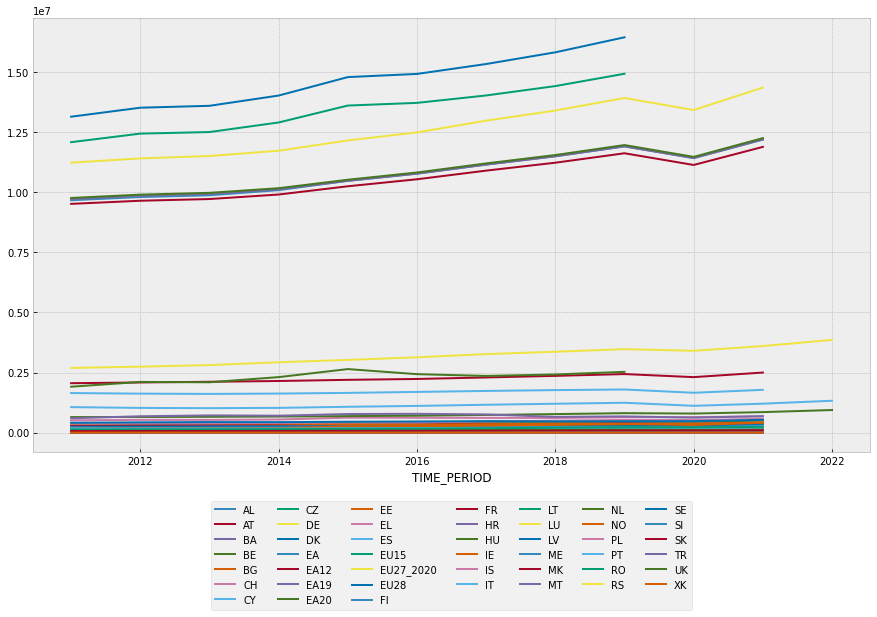

In [19]:
# Visualize result (only GDP)
eurostat_expenditure['GDP'].unstack('geo'
                        ).plot(figsize=(15, 8)
                                ).legend(**LEGEND_STYLE)

#### Production approach

In [20]:
# select national account codes to be isolated in the data 
# https://dd.eionet.europa.eu/vocabulary/eurostat/na_item/view
# "B1G" = "Value added, gross"
# "D21" = "Taxes on products"
# "D31" = "Subsidies on products"

INDICATORS_PRODUCTION = ["B1G", "D21", "D31"]

# Ensure all items are available in the GDP breakdown csv
if not set(eurostat_data['na_item'].unique()) & set(INDICATORS_PRODUCTION) == set(INDICATORS_PRODUCTION):
    raise ValueError("Missing indicators")

In [21]:
# only keeps rows for the above indicators after "START_YEAR"
MASK = (eurostat_data['na_item'].isin(INDICATORS_PRODUCTION)) & (eurostat_data['TIME_PERIOD'] >= START_YEAR)
eurostat_production = eurostat_data[MASK][['geo', 'TIME_PERIOD', 'na_item', 'OBS_VALUE']]
eurostat_production

,geo,TIME_PERIOD,na_item,OBS_VALUE
306488,AL,2011,B1G,8060.4
306489,AL,2012,B1G,8305.1
306490,AL,2013,B1G,8396.5
306491,AL,2014,B1G,8700.7
306492,AL,2015,B1G,9014.8
...,...,...,...,...
320365,XK,2017,D31,49.7
320366,XK,2018,D31,49.6
320367,XK,2019,D31,61.5
320368,XK,2020,D31,97.1


In [22]:
# Re-organize dataframe structure
eurostat_production = eurostat_production.pivot(index=['geo', 'TIME_PERIOD'], columns='na_item', values='OBS_VALUE')
eurostat_production

na_item             B1G     D21   D31
geo TIME_PERIOD                      
AL  2011         8060.4  1278.1  70.2
    2012         8305.1  1291.4  10.7
    2013         8396.5  1252.8  24.0
    2014         8700.7  1310.6  42.7
    2015         9014.8  1282.2  32.9
...                 ...     ...   ...
XK  2017         5106.0  1300.2  49.7
    2018         5379.8  1341.4  49.6
    2019         5698.6  1419.0  61.5
    2020         5590.5  1278.1  97.1
    2021         6385.8  1654.9  82.8

[500 rows x 3 columns]

In [23]:
# check for nan values and replace them with 0
if eurostat_production.isna().any().any():
    # check columns with nan values
    columns_with_nan = eurostat_production.columns[eurostat_production.isna().any()].tolist()
    # check rows with nan values
    rows_with_nan = eurostat_production[columns_with_nan].isna().any(axis=1)
    # display result
    print(eurostat_production[rows_with_nan])
    warnings.warn("Nan values detected. Nan values replaced with 0")
    eurostat_production = eurostat_production.fillna(0)

na_item                B1G  D21  D31
geo TIME_PERIOD                     
BA  2021           16467.9  NaN  NaN
EA  2011         8762043.9  NaN  NaN
    2012         8793363.0  NaN  NaN
    2013         8878667.5  NaN  NaN
    2014         9101023.6  NaN  NaN
...                    ...  ...  ...
TR  2017          674612.8  NaN  NaN
    2018          590360.2  NaN  NaN
    2019          610568.6  NaN  NaN
    2020          557149.2  NaN  NaN
    2021          616528.3  NaN  NaN

[95 rows x 3 columns]


/tmp/ipykernel_594308/3666183861.py:9: UserWarning: Nan values detected. Nan values replaced with 0
  warnings.warn("Nan values detected. Nan values replaced with 0")


In [24]:
# Calculate GDP (= B1G + D21 - D31)
# Reminder: nan + X = nan
eurostat_production['GDP'] = eurostat_production['B1G'] + eurostat_production['D21'] - eurostat_production['D31']
eurostat_production

na_item             B1G     D21   D31      GDP
geo TIME_PERIOD                               
AL  2011         8060.4  1278.1  70.2   9268.3
    2012         8305.1  1291.4  10.7   9585.8
    2013         8396.5  1252.8  24.0   9625.3
    2014         8700.7  1310.6  42.7   9968.6
    2015         9014.8  1282.2  32.9  10264.1
...                 ...     ...   ...      ...
XK  2017         5106.0  1300.2  49.7   6356.5
    2018         5379.8  1341.4  49.6   6671.6
    2019         5698.6  1419.0  61.5   7056.1
    2020         5590.5  1278.1  97.1   6771.5
    2021         6385.8  1654.9  82.8   7957.9

[500 rows x 4 columns]

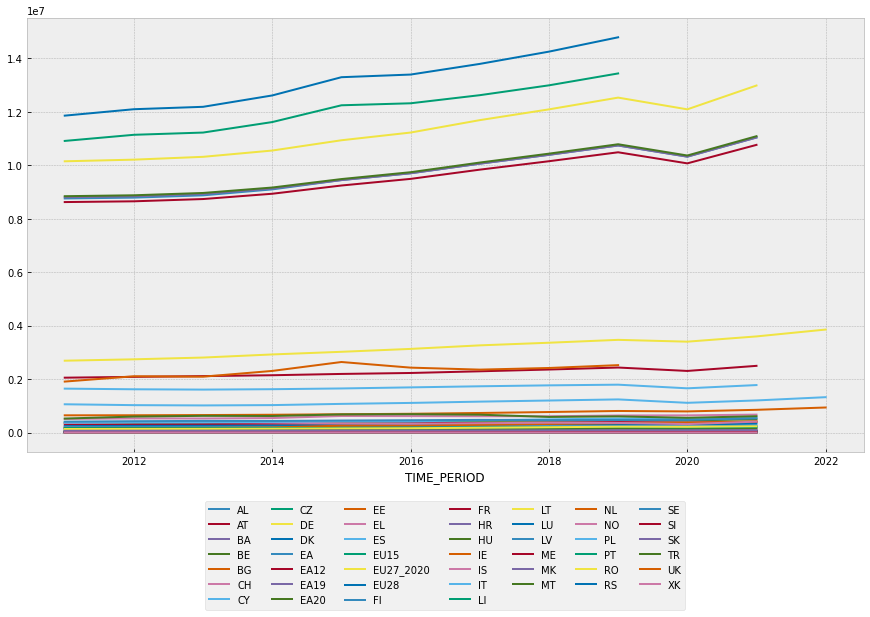

In [25]:
# Visualize result (only GDP)
eurostat_production['GDP'].unstack('geo'
                        ).plot(figsize=(15, 8)
                                ).legend(**LEGEND_STYLE)

### Comparison

In [26]:
# Compare the different GDP calculations 
EXAMPLE_COUNTRIES = ['NL', 'FR']

check = pd.concat(
            [eurostat_income['GDP'], eurostat_expenditure['GDP'], eurostat_production['GDP']], 
            axis=1,
            keys = ('income', 'expenditure', 'production')
        ).loc[EXAMPLE_COUNTRIES]

MASK = check.ne(check.iloc[:, 0], axis=0).any(axis=1)
check[MASK]

income  expenditure  production
geo TIME_PERIOD                                    
NL  2022          100147.0     942881.0    942881.0
FR  2011         2058369.0    2058370.0   2058369.0
    2013         2117191.0    2117189.0   2117189.0
    2021         2500872.0    2500871.0   2500871.0

## Reconstruct Dutch GDP

Using the [CBS data](https://www.cbs.nl/en-gb/custom/2022/27/national-accounts-2021-tables) calculate the total GDP total and its composition using the three approaches

Methods can be found using the following link in the file "2 Macroeconomic totals.xlsx" 

![IOT basic price](../img/IOT_basic_price.png)


### Data pre-processing

In [27]:
# Import data
FILEPATH = "../data/CBS/83 InputOutput tables 20152021.xlsx"
cbs_io = pd.ExcelFile(FILEPATH, engine="openpyxl")

In [28]:
# print list of sheets available
cbs_io.sheet_names

['IO-table 2015 current prices',
 'IO-table 2016 current prices',
 'IO-table 2016 PY prices',
 'IO-table 2017 current prices',
 'IO-table 2017 PY prices',
 'IO-table 2018 current prices',
 'IO-table 2018 PY prices',
 'IO-table 2019 current prices',
 'IO-table 2019 PY prices',
 'IO-table 2020 current prices',
 'IO-table 2020 PY prices',
 'IO-table 2021 current prices',
 'IO-table 2021 PY prices',
 'Explanation']

In [29]:
# Only keep 2021 current price sheet
cbs_data = cbs_io.parse(
    "IO-table 2021 current prices", 
    index_col=1, 
    header=1, 
    skipfooter=3
)
cbs_data

,Unnamed: 0,"Crop, animal production, hunting and related activities",Forestry and logging,Fishing and aquaculture,Extraction of crude petroleum and natural gas,"Other mining and quarrying, except petroleum and gas",Mining support activities,Manufacture of food products,Manufacture of beverages,Manufacture of tobacco products,...,Final consumption expenditure of NPIs serving households,Social transfers in kind,Other individual final consumption of general goevernment,Collective final consumption of general gorvernment,Gross fixed capital formation,Changes in inventories 1),Trade and transport margins,Cif/fob-adjustment and reclassification,Cif/fob-reclassification,Total
2021*,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0
"Crop, animal production, hunting and related activities",1.0,5794.0,21.0,3.0,7.0,0.0,0.0,10207.0,31.0,30.0,...,0.0,74.0,0.0,0.0,451.0,-81.0,972.0,NaN,NaN,34011.0
Forestry and logging,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,98.0,8.0,1.0,0.0,NaN,NaN,369.0
Fishing and aquaculture,3.0,0.0,0.0,2.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,NaN,NaN,535.0
Extraction of crude petroleum and natural gas,4.0,68.0,0.0,0.0,172.0,0.0,0.0,127.0,26.0,0.0,...,0.0,0.0,0.0,0.0,17.0,-449.0,108.0,NaN,NaN,5995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Employers' social contributions,95.0,794.0,26.0,18.0,80.0,32.0,66.0,1544.0,139.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,91321.0
Operating surplus (gross),96.0,10263.0,44.0,228.0,3673.0,339.0,192.0,4953.0,754.0,2865.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,358999.0
Value added at basic prices (92–96),97.0,12761.0,165.0,321.0,4018.0,502.0,449.0,12043.0,1367.0,2930.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762564.0


In [30]:
# drop the first row (2nd in excel)
cbs_data.drop(cbs_data.index[0], axis=0, inplace=True)
# drop the first column (2nd in excel)
cbs_data.drop(cbs_data.columns[0], axis=1, inplace=True)
# Clear trailing white spaces in columns/index
cbs_data.columns = cbs_data.columns.str.strip()
cbs_data.index = cbs_data.index.str.strip()
cbs_data

,"Crop, animal production, hunting and related activities",Forestry and logging,Fishing and aquaculture,Extraction of crude petroleum and natural gas,"Other mining and quarrying, except petroleum and gas",Mining support activities,Manufacture of food products,Manufacture of beverages,Manufacture of tobacco products,"Manufacture of textiles, wearing apparel and leather",...,Final consumption expenditure of NPIs serving households,Social transfers in kind,Other individual final consumption of general goevernment,Collective final consumption of general gorvernment,Gross fixed capital formation,Changes in inventories 1),Trade and transport margins,Cif/fob-adjustment and reclassification,Cif/fob-reclassification,Total
2021*,,,,,,,,,,,,,,,,,,,,,
"Crop, animal production, hunting and related activities",5794.0,21.0,3.0,7.0,0.0,0.0,10207.0,31.0,30.0,90.0,...,0.0,74.0,0.0,0.0,451.0,-81.0,972.0,NaN,NaN,34011.0
Forestry and logging,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,98.0,8.0,1.0,0.0,NaN,NaN,369.0
Fishing and aquaculture,0.0,0.0,2.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,NaN,NaN,535.0
Extraction of crude petroleum and natural gas,68.0,0.0,0.0,172.0,0.0,0.0,127.0,26.0,0.0,3.0,...,0.0,0.0,0.0,0.0,17.0,-449.0,108.0,NaN,NaN,5995.0
"Other mining and quarrying, except petroleum and gas",17.0,0.0,0.0,0.0,167.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,21.0,0.0,37.0,NaN,NaN,1307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Employers' social contributions,794.0,26.0,18.0,80.0,32.0,66.0,1544.0,139.0,13.0,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,91321.0
Operating surplus (gross),10263.0,44.0,228.0,3673.0,339.0,192.0,4953.0,754.0,2865.0,522.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,358999.0
Value added at basic prices (92–96),12761.0,165.0,321.0,4018.0,502.0,449.0,12043.0,1367.0,2930.0,1161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,762564.0


In [31]:
# Convert negative index (-) with positive value into negative values
items_with_neg = [
    "Import subsidies (–)",
    "Subsidies on domestic products (–)",
    "Other subsidies on production (–)",
]
cbs_data.loc[items_with_neg] = -cbs_data.loc[items_with_neg]

### Sanity check

In [32]:
# Check that total inputs = total outputs
total_inputs = cbs_data.loc["Total",:"Goods and services n.e.c."].sum()
total_outputs = cbs_data.loc[:"Goods and services n.e.c.","Total"].sum()

if not total_inputs == total_outputs:
    raise ValueError("inputs / outputs not matching")

In [33]:
# Other sanity check?

### Income

In [34]:
INDICATORS_INCOME = [
    "Wages and salaries", 
    "Employers' social contributions", 
    "Operating surplus (gross)", 
    "Import duties", 
    "Taxes on domestic products",
    "Import subsidies (–)",
    "Other taxes on imports", 
    "Other taxes on production", 
    "Subsidies on domestic products (–)",
    "Other subsidies on production (–)",
]

INDICATORS_EXPENDITURE = [
    "Exports of goods",
    "Exports of services",
    "Final consumption expenditure of households",
    "Final consumption expenditure of NPIs serving households",
    "Social transfers in kind",
    "Other individual final consumption of general goevernment",
    "Collective final consumption of general gorvernment",
    "Gross fixed capital formation",
    "Changes in inventories 1)",
    "Trade and transport margins",
    "Cif/fob-adjustment and reclassification",
    "Cif/fob-reclassification"    
]

INDICATORS_PRODUCTION = [
    "Other taxes on production", 
    "Other subsidies on production (–)",
    "Wages and salaries", 
    "Employers' social contributions", 
    "Operating surplus (gross)",
]

In [35]:
cbs_data_income = cbs_data.loc[INDICATORS_INCOME].drop(
    ["Total (1–81)","Total"], axis=1  # drop Total columns to avoid double counting
    ).sum().sum()
cbs_data_income

856356.0

In [36]:
# Compare with previous Eurostat GDP income
cbs_data_income == eurostat_income.loc[('NL', 2021)]['GDP']

True

### Expenditure

In [37]:
cbs_data_expenditure = cbs_data.loc[INDICATORS_INCOME].drop(
    ["Total (1–81)","Total"], axis=1  # drop Total columns to avoid double counting
    ).sum().sum()
cbs_data_expenditure

856356.0

In [38]:
# Compare with previous Eurostat GDP expenditure
cbs_data_expenditure == eurostat_expenditure.loc[('NL', 2021)]['GDP']

True

### Production

In [39]:
# to calculate GDP/production, adds everything until column: "Goods and services n.e.c." 
cbs_data_production = cbs_data.loc[INDICATORS_PRODUCTION, :"Goods and services n.e.c."].sum().sum()
cbs_data_production

762564.0

In [40]:
# Let's compare with previous Eurostat GDP production
cbs_data_production == eurostat_production.loc[('NL', 2021)]['GDP']

False

In [41]:
# For production, We need to add taxes and subtract subsidies to obtain GDP
TAXES_MINUS_SUBSIDIES = [
    "Import duties", 
    "Other taxes on imports", 
    "Taxes on domestic products", 
    "Import subsidies (–)",
    "Subsidies on domestic products (–)",
]

# only keeps "relevant" columns
cbs_data_production += cbs_data.loc[TAXES_MINUS_SUBSIDIES, "Total (1–81)":"Trade and transport margins"].sum().sum()
cbs_data_production

856356.0

In [42]:
# Compare data from Eurostat vs CBS
cbs_data_production == eurostat_production.loc[('NL', 2021)]['GDP']

True